In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
import os
import zipfile
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import gensim.downloader as api

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
word_embeddings_model = api.load("glove-wiki-gigaword-100")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[==================================================] 100.0% 128.1/128.1MB downloaded


Below is the code for calculating TF-IDF:

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents. It is crucial for extractive text summarization because it helps identify and extract the most significant sentences by highlighting the terms that are most relevant and unique within the document.

In [ ]:
def extract_tfidf(text):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names


Below is the code for calculating word embeddings:

**Word embeddings** are vector representations of words that capture their semantic meanings based on their context in large text corpora. They are important for extractive text summarization because they allow the model to understand and extract semantically rich and contextually relevant sentences.

In [ ]:

def extract_word_embeddings(text):
    words = word_tokenize(text.lower())
    word_vectors = []
    for word in words:
        if word in word_embeddings_model:
            word_vectors.append(word_embeddings_model[word])
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word_embeddings_model.vector_size)



Below is the code for calculating Sentence embeddings:

**Sentence embeddings** are vector representations of entire sentences that capture their semantic meanings and relationships. They are important for extractive text summarization because they enable the model to identify and extract the most contextually and semantically relevant sentences from a document.

In [ ]:

def extract_sentence_embeddings(text):
    sentences = sent_tokenize(text)
    sentence_vectors = []
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        word_vectors = []
        for word in words:
            if word in word_embeddings_model:
                word_vectors.append(word_embeddings_model[word])
        if word_vectors:
            sentence_vectors.append(np.mean(word_vectors, axis=0))
    if sentence_vectors:
        return np.mean(sentence_vectors, axis=0)
    else:
        return np.zeros(word_embeddings_model.vector_size)


Below is the code that assigns Part of Speech to each word in the document:

**Part-of-Speech (POS) tagging** assigns grammatical tags to each word in a sentence, such as noun, verb, or adjective. It is important for extractive text summarization because it helps the model understand the syntactic structure of sentences, allowing for more accurate identification and extraction of key information.

In [ ]:

def perform_pos_tagging(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags



In [ ]:
os.listdir('/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files')

['business', 'entertainment', 'politics', 'sport', 'tech']

**The below code computes the similarity between the title and the content of a document using vectorization and cosine similarity. This is important for extractive text summarization because it helps identify and extract sentences that are most relevant to the title, ensuring that the summary is both coherent and focused on the main topic of the document.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compute_title_content_similarity(title, content):
    if not title or not content:
        print("Error: Title or content is empty.")
        return 0

    try:
        vectorizer = CountVectorizer().fit([title, content])
        title_vec, content_vec = vectorizer.transform([title, content]).toarray()

        similarity_score = cosine_similarity([title_vec], [content_vec])[0][0]
        return similarity_score

    except Exception as e:
        print("Error computing similarity:", e)
        return 0


This code iterates through each text file in a specified directory, extracts the title enclosed within `<t>` tags, and then prints information about the file, including the title, content, similarity score between the title and content, TF-IDF matrix, word embeddings vector, sentence embeddings vector, and POS tags.

In [ ]:

import os
from bs4 import BeautifulSoup

input_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files'

def process_files(directory):
    for root, _, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith('.txt'):
                file_path = os.path.join(root, file_name)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        text = file.read()

                    soup = BeautifulSoup(text, 'html.parser')

                    title_tag = soup.find('t')
                    if title_tag:
                        title = title_tag.get_text()
                        print(f"File: {file_name}")
                        print("Title:", title)
                    else:
                        print(f"Error: Title not found in file '{file_name}'")

                    print("File: ", file_name)
                    print("Title: ", title)
                    print("")

                    print("File Content:")
                    print(text)
                    print("")

                    similarity_score = compute_title_content_similarity(title, text)
                    print("Title-Content Similarity Score:", similarity_score)
                    print("")

                    try:
                        tfidf_matrix, _ = extract_tfidf(text)
                        print("TF-IDF Matrix:")
                        print(tfidf_matrix.toarray())
                        print("")
                    except Exception as tfidf_error:
                        print("Error extracting TF-IDF features:", tfidf_error)

                    try:
                        word_embeddings_vector = extract_word_embeddings(text)
                        print("Word Embeddings Vector:")
                        print(word_embeddings_vector)
                        print("")
                    except Exception as word_embeddings_error:
                        print("Error extracting word embeddings:", word_embeddings_error)

                    try:
                        sentence_embeddings_vector = extract_sentence_embeddings(text)
                        print("Sentence Embeddings Vector:")
                        print(sentence_embeddings_vector)
                        print("")
                    except Exception as sentence_embeddings_error:
                        print("Error extracting sentence embeddings:", sentence_embeddings_error)

                    try:
                        pos_tags = perform_pos_tagging(text)
                        print("POS Tags:")
                        print(pos_tags)
                        print("")
                    except Exception as pos_tagging_error:
                        print("Error performing POS tagging:", pos_tagging_error)

                    print("------------------------------------------------------")

                except Exception as e:
                    print(f"Error processing file '{file_name}': {e}")


process_files(input_directory)


Streaming output truncated to the last 5000 lines.

The machine's European launch was put back "a few months" last week in order to make sure enough of the devices were ready for its US launch, as well as satisfying the Japanese market. The PSP has almost as much processing power in it as the PlayStation 2 console. Hundreds of gamers gathered at US shops, some waiting for more than 36 hours, to be the first to get their hands on the gadget. A spokesman for one US shop said it expected the device to sell out on its first day. The 24 games for the mini console include Ape Academy, Formula One, Wipeout Pure and Fired Up. Movie studios, including Lions Gate Entertainment and Disney, have also announced forthcoming film titles that will be made available on the UMD format.


Title-Content Similarity Score: 0.20607685131359638

TF-IDF Matrix:
[[0.01869567 0.01869567 0.01869567 0.01869567 0.01869567 0.01869567
  0.01869567 0.01869567 0.01869567 0.01869567 0.03739134 0.01869567
  0.01869567 0.

The code computes two important scoring metrics for each document in a collection:

1. **Average Sentence Position Score**: Evaluates the relative importance of sentences based on their position within the document.

2. **Average Proper Noun Score**: Assesses the relevance of sentences by measuring the density of proper nouns, which often signify important entities or concepts.

These scores aid in identifying and selecting key sentences for extractive text summarization, enhancing the quality and informativeness of the resulting summaries.

In [ ]:
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
from collections import Counter

def sentence_position_score(total_sentences):
    return [(1 - (i / total_sentences)) for i in range(total_sentences)]

def proper_noun_score(text):
    tagged_words = pos_tag(word_tokenize(text))
    proper_nouns = [word for word, pos in tagged_words if pos == 'NNP']
    return len(proper_nouns) / len(tagged_words) if len(tagged_words) > 0 else 0

def compute_scores(text):
    sentences = sent_tokenize(text)
    total_sentences = len(sentences)
    total_words = len(word_tokenize(text))
    position_scores = sentence_position_score(total_sentences)
    noun_score = proper_noun_score(text)
    return position_scores, noun_score

input_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files'

for root, dirs, files in os.walk(input_directory):
    for file in files:
        file_path = os.path.join(root, file)

        # Skip non-text files
        if not file_path.lower().endswith('.txt'):
            print(f"Skipping file '{file}' as it is not a text file.")
            continue

        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
                position_scores, noun_score = compute_scores(text)
                avg_position_score = sum(position_scores) / len(position_scores) if position_scores else 0
                avg_noun_score = noun_score
                print("File:", file)
                print("Average Sentence Position Score:", avg_position_score)
                print("Average Proper Noun Score:", avg_noun_score)
                print()
        except Exception as e:
            print(f"Error processing file '{file}': {e}")


Streaming output truncated to the last 5000 lines.
Average Sentence Position Score: 0.5185185185185185
Average Proper Noun Score: 0.07325383304940375

File: 081.txt
Average Sentence Position Score: 0.5277777777777778
Average Proper Noun Score: 0.1037037037037037

File: 082.txt
Average Sentence Position Score: 0.5192307692307693
Average Proper Noun Score: 0.13911620294599017

File: 083.txt
Average Sentence Position Score: 0.5333333333333333
Average Proper Noun Score: 0.1274787535410765

File: 084.txt
Average Sentence Position Score: 0.5384615384615385
Average Proper Noun Score: 0.09477124183006536

File: 085.txt
Average Sentence Position Score: 0.5227272727272727
Average Proper Noun Score: 0.13798977853492334

File: 086.txt
Average Sentence Position Score: 0.5227272727272727
Average Proper Noun Score: 0.09533898305084745

File: 087.txt
Average Sentence Position Score: 0.5185185185185185
Average Proper Noun Score: 0.10028653295128939

File: 088.txt
Average Sentence Position Score: 0.5172

The belw code is essential in extracting crucial features necessary for performing extractive text summarization.


1. **Title Similarity**: This feature allows the code to identify sentences closely aligned with the main topic by assessing their similarity to the document's title. This ensures that the summary captures the essence of the title effectively.

2. **Positional Feature**: By calculating the average position score of sentences within each document, the code discerns their relative importance based on their placement. Prioritizing sentences based on their contextual significance helps maintain coherence and relevance in the summary.

3. **Sentence Length**: Assessing the average sentence length aids in identifying concise and informative sentences suitable for inclusion in the summary. Emphasizing shorter sentences enhances the summary's readability and ensures efficient communication of key points.

4. **Proper Noun Score**: Analyzing the density of proper nouns highlights significant entities or concepts within the text. This feature ensures the inclusion of sentences containing essential information or referencing crucial entities, thus enriching the summary's relevance and informativeness.

In essence, by extracting and incorporating these features into the feature matrix, the code provides essential inputs for the model to effectively perform extractive text summarization.

In [ ]:
input_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files'

title_similarity_list = []
position_scores_list = []
term_weight_list = []
sentence_length_list = []
proper_noun_score_list = []

for root, dirs, files in os.walk(input_directory):
    for file in files:
        file_path = os.path.join(root, file)

        # Skip non-text files
        if not file_path.lower().endswith('.txt'):
            print(f"Skipping file '{file}' as it is not a text file.")
            continue

        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()

                soup = BeautifulSoup(text, 'html.parser')

                title_tag = soup.find('t')
                title = title_tag.text if title_tag else ""

                title_similarity = compute_title_content_similarity(title, text)

                sentences = sent_tokenize(text)
                total_sentences = len(sentences)

                if total_sentences > 0:
                    position_scores = sentence_position_score(total_sentences)
                    avg_position_score = np.mean(position_scores)
                else:
                    avg_position_score = 0  # Default value when no sentences are found

                total_words = len(word_tokenize(text))
                avg_sentence_length = total_words / total_sentences if total_sentences > 0 else 0

                noun_score = proper_noun_score(text)

                title_similarity_list.append(title_similarity)
                position_scores_list.append(avg_position_score)
                sentence_length_list.append(avg_sentence_length)
                proper_noun_score_list.append(noun_score)

        except Exception as e:
            print(f"Error processing file '{file}': {e}")

title_similarity_array = np.array(title_similarity_list)
position_scores_array = np.array(position_scores_list)
sentence_length_array = np.array(sentence_length_list)
proper_noun_score_array = np.array(proper_noun_score_list)

feature_matrix = np.column_stack((title_similarity_array, position_scores_array, sentence_length_array, proper_noun_score_array))

print("Feature Matrix:")
print(feature_matrix)

Skipping file '400.gdoc' as it is not a text file.
Feature Matrix:
[[ 0.16714021  0.525      25.1         0.09960159]
 [ 0.1948093   0.53333333 29.66666667  0.11011236]
 [ 0.23249528  0.54166667 25.5         0.14052288]
 ...
 [ 0.10789803  0.51111111 25.82222222  0.06110155]
 [ 0.23904572  0.53125    25.9375      0.1060241 ]
 [ 0.1906592   0.5033557  22.60402685  0.03295724]]


Various features are extracted from each sentence, including:

**Sentence Position Score:** Determining the relative position of each sentence within the document, offering insights into its contextual importance.

**Sentence Length:** Measuring the length of individual sentences to identify concise and informative text segments.

**Proper Noun Score:** Calculating the density of proper nouns within sentences, indicating the presence of significant entities or concepts.

Upon extracting these features, the code constructs a sentence matrix by combining the feature arrays for all sentences. This matrix serves as essential input data for subsequent machine learning models employed in extractive text summarization tasks.

In [ ]:
import os
import numpy as np
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

def sentence_position_score(total_sentences):
    return [(1 - (i / total_sentences)) for i in range(total_sentences)]

def proper_noun_score(text):
    tagged_words = pos_tag(word_tokenize(text))
    proper_nouns = [word for word, pos in tagged_words if pos == 'NNP']
    return len(proper_nouns) / len(tagged_words) if len(tagged_words) > 0 else 0

def compute_title_content_similarity(title, content):
    return len(set(title.split()) & set(content.split())) / max(len(set(title.split())), 1)

title_similarity_list = []
position_scores_list = []
sentence_length_list = []
proper_noun_score_list = []

input_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files'

for root, dirs, files in os.walk(input_directory):
    for file in files:
        if file.endswith('.txt'):
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()

                soup = BeautifulSoup(text, 'html.parser')

                title_tag = soup.find('t')
                title = title_tag.text if title_tag else ""

                if not title or not text:
                    print(f"Skipping file '{file}' due to empty title or content")
                    continue

                title_similarity = compute_title_content_similarity(title, text)

                sentences = sent_tokenize(text)
                total_sentences = len(sentences)

                if total_sentences > 0:
                    sentence_position_scores = sentence_position_score(total_sentences)
                    sentence_proper_noun_scores = [proper_noun_score(sentence) for sentence in sentences]
                    sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]

                    title_similarity_list.extend([title_similarity] * total_sentences)
                    position_scores_list.extend(sentence_position_scores)
                    sentence_length_list.extend(sentence_lengths)
                    proper_noun_score_list.extend(sentence_proper_noun_scores)

                    print(f"Processed {total_sentences} sentences in file '{file}'")  # Debug print
                else:
                    print(f"No sentences found in file '{file}'")

title_similarity_array = np.array(title_similarity_list)
position_scores_array = np.array(position_scores_list)
sentence_length_array = np.array(sentence_length_list)
proper_noun_score_array = np.array(proper_noun_score_list)

print("Title similarity array shape:", title_similarity_array.shape)
print("Position scores array shape:", position_scores_array.shape)
print("Sentence length array shape:", sentence_length_array.shape)
print("Proper noun score array shape:", proper_noun_score_array.shape)

if len(title_similarity_array) > 0 and len(position_scores_array) > 0 and len(sentence_length_array) > 0 and len(proper_noun_score_array) > 0:
    sentence_matrix = np.column_stack((title_similarity_array, position_scores_array, sentence_length_array, proper_noun_score_array))
    print("Sentence Matrix:")
    print(sentence_matrix)
else:
    print("Error: One or more arrays are empty, cannot construct sentence matrix.")


Processing file: /content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files/business/001.txt
Processed 20 sentences in file '001.txt'
Processing file: /content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files/business/002.txt
Processed 15 sentences in file '002.txt'
Processing file: /content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files/business/003.txt
Processed 12 sentences in file '003.txt'
Processing file: /content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files/business/004.txt
Processed 19 sentences in file '004.txt'
Processing file: /content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files/business/005.txt
Processed 12 sentences in file '005.txt'
Processing file: /content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files/business/006.txt
Processed 9 sentences in file '006.txt'
Processing file: /content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files/business/007.txt
Processed 14 sentences in file '007.txt'


This code implements a two-layered Restricted Boltzmann Machine (RBM) to transform the feature representation of input data stored in the `sentence_matrix`. The RBM layers learn hierarchical representations of the data, resulting in an enhanced feature matrix (`enhanced_feature_matrix`) that captures higher-level features.

In [ ]:
import os
import numpy as np
from sklearn.neural_network import BernoulliRBM
from nltk.tokenize import sent_tokenize

def sentence_position_score(total_sentences):
    return [(1 - (i / total_sentences)) for i in range(total_sentences)]

def proper_noun_score(text):
    from nltk import pos_tag, word_tokenize
    tagged_words = pos_tag(word_tokenize(text))
    proper_nouns = [word for word, pos in tagged_words if pos == 'NNP']
    return len(proper_nouns) / len(tagged_words) if len(tagged_words) > 0 else 0

def compute_scores(text):
    sentences = sent_tokenize(text)
    total_sentences = len(sentences)
    position_scores = sentence_position_score(total_sentences)
    noun_score = proper_noun_score(text)
    return position_scores, noun_score

input_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files'
output_directory = '/content/drive/My Drive/RBM/Generated_Summaries'

# Define a range of hyperparameters to search through
n_components_list = [20,100,150]
learning_rate_list = [0.01, 0.05, 0.1]
n_iter_list = [10, 20, 30]

best_performance = float('inf')
best_params = {}

for n_components in n_components_list:
    for learning_rate in learning_rate_list:
        for n_iter in n_iter_list:
            print(f"Testing RBM with n_components={n_components}, learning_rate={learning_rate}, n_iter={n_iter}")
            performance_metric = 0

            for root, dirs, files in os.walk(input_directory):
                for folder in dirs:
                    input_subfolder = os.path.join(input_directory, folder)
                    output_subfolder = os.path.join(output_directory, folder)
                    os.makedirs(output_subfolder, exist_ok=True)

                    for file in os.listdir(input_subfolder):
                        if file.endswith(".txt"):
                            position_scores_list = []
                            proper_noun_score_list = []
                            file_path = os.path.join(input_subfolder, file)
                            with open(file_path, 'r', encoding='utf-8') as f:
                                text = f.read()
                                position_scores, noun_score = compute_scores(text)
                                position_scores_list.extend(position_scores)
                                proper_noun_score_list.extend([noun_score] * len(position_scores))

                            position_scores_array = np.array(position_scores_list)
                            proper_noun_score_array = np.array(proper_noun_score_list)
                            sentence_matrix = np.column_stack((position_scores_array, proper_noun_score_array))

                            # Initialize and fit the first RBM
                            rbm1 = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, n_iter=n_iter, random_state=0)
                            rbm1.fit(sentence_matrix)
                            s_prime = rbm1.transform(sentence_matrix)

                            # Initialize and fit the second RBM
                            rbm2 = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, n_iter=n_iter, random_state=1)
                            rbm2.fit(s_prime)
                            s_double_prime = rbm2.transform(s_prime)

                            enhanced_feature_matrix = s_double_prime

                            feature_sums = np.sum(enhanced_feature_matrix, axis=1)

                            sorted_indices = np.argsort(feature_sums)[::-1]

                            N = 5  # Number of sentences to select

                            selected_indices = sorted_indices[:N]

                            selected_indices = np.sort(selected_indices)

                            sentences = sent_tokenize(text)

                            summary = ""
                            for index in selected_indices:
                                if index < len(sentences):
                                    summary += sentences[index] + "\n"
                                else:
                                    print("Index out of range:", index)

                            summary_file_path = os.path.join(output_subfolder, file)
                            with open(summary_file_path, 'w', encoding='utf-8') as summary_file:
                                summary_file.write(summary)

                            # Evaluate the performance (e.g., sum of feature_sums as a simple metric)
                            performance_metric += np.sum(feature_sums)

            # Track the best hyperparameters
            if performance_metric < best_performance:
                best_performance = performance_metric
                best_params = {
                    'n_components': n_components,
                    'learning_rate': learning_rate,
                    'n_iter': n_iter
                }

print("Best hyperparameters found:")
print(best_params)


In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM

n_components = 150
learning_rate = 0.1
n_iter = 50

rbm1 = BernoulliRBM(n_components=n_components,learning_rate = learning_rate, n_iter = n_iter, random_state=0)
rbm1.fit(sentence_matrix)
s_prime = rbm1.transform(sentence_matrix)

rbm2 = BernoulliRBM(n_components=n_components, random_state=1)
rbm2.fit(s_prime)
s_double_prime = rbm2.transform(s_prime)

enhanced_feature_matrix = s_double_prime

print("Enhanced Feature Matrix:")
print(enhanced_feature_matrix)


This code automates the process of generating extractive summaries for text documents using a two-layered Restricted Boltzmann Machine (RBM) approach. It begins by computing positional scores and proper noun scores for each sentence in the input text files. Then, it constructs a sentence matrix based on these scores. The sentence matrix undergoes transformation through two RBMs successively to enhance the feature representation. After transformation, the code calculates the sum of features for each sentence and selects the top N sentences with the highest feature sums to form the summary. Finally, it writes the generated summaries to output files. This automation streamlines the summarization process and produces concise summaries from large volumes of text data.

In [ ]:
import os
import numpy as np
from sklearn.neural_network import BernoulliRBM
from nltk.tokenize import sent_tokenize

def sentence_position_score(total_sentences):
    return [(1 - (i / total_sentences)) for i in range(total_sentences)]

def proper_noun_score(text):
    from nltk import pos_tag, word_tokenize
    tagged_words = pos_tag(word_tokenize(text))
    proper_nouns = [word for word, pos in tagged_words if pos == 'NNP']
    return len(proper_nouns) / len(tagged_words) if len(tagged_words) > 0 else 0

def compute_scores(text):
    sentences = sent_tokenize(text)
    total_sentences = len(sentences)
    position_scores = sentence_position_score(total_sentences)
    noun_score = proper_noun_score(text)
    return position_scores, noun_score

input_directory = '/content/drive/My Drive/zip_ref/BBC News Summary/preprocessed_files'
output_directory = '/content/drive/My Drive/RBM_256_1/Generated_Summaries'

# Hyperparameters for RBM
n_components = 256  # Number of components to keep
learning_rate = 0.1  # Learning rate
n_iter = 70  # Number of iterations for training

for root, dirs, files in os.walk(input_directory):
    for folder in dirs:
        input_subfolder = os.path.join(input_directory, folder)
        output_subfolder = os.path.join(output_directory, folder)
        os.makedirs(output_subfolder, exist_ok=True)

        for file in os.listdir(input_subfolder):
            if file.endswith(".txt"):
                position_scores_list = []
                proper_noun_score_list = []
                file_path = os.path.join(input_subfolder, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read()
                    position_scores, noun_score = compute_scores(text)
                    position_scores_list.extend(position_scores)
                    proper_noun_score_list.extend([noun_score] * len(position_scores))

                position_scores_array = np.array(position_scores_list)
                proper_noun_score_array = np.array(proper_noun_score_list)
                sentence_matrix = np.column_stack((position_scores_array, proper_noun_score_array))

                # Initialize and fit the first RBM
                rbm1 = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, n_iter=n_iter, random_state=0)
                rbm1.fit(sentence_matrix)
                s_prime = rbm1.transform(sentence_matrix)

                # Initialize and fit the second RBM
                rbm2 = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, n_iter=n_iter, random_state=1)
                rbm2.fit(s_prime)
                s_double_prime = rbm2.transform(s_prime)

                enhanced_feature_matrix = s_double_prime

                feature_sums = np.sum(enhanced_feature_matrix, axis=1)

                sorted_indices = np.argsort(feature_sums)[::-1]

                N = 5  # Number of sentences to select

                selected_indices = sorted_indices[:N]

                selected_indices = np.sort(selected_indices)

                sentences = sent_tokenize(text)

                summary = ""
                for index in selected_indices:
                    if index < len(sentences):
                        summary += sentences[index] + "\n"
                    else:
                        print("Index out of range:", index)

                summary_file_path = os.path.join(output_subfolder, file)
                with open(summary_file_path, 'w', encoding='utf-8') as summary_file:
                    summary_file.write(summary)

                print("Summary generated and saved to:", summary_file_path)


Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/001.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/002.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/003.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/004.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/005.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/006.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/007.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/008.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generated_Summaries/business/009.txt
Summary generated and saved to: /content/drive/My Drive/RBM_256_1/Generat

**The extracted summary for a sample file:**

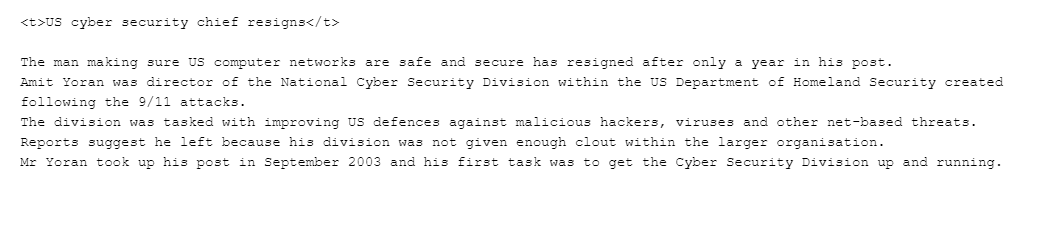